In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv(r'C:\Users\DELL PC\Desktop\ML\DL\useful_data\homeprices_banglore.csv')
df.sample(5)

,total_sqft_int,balcony,price
281,1079.0,1.0,60.0
25,2850.0,1.0,428.0
477,1200.0,0.0,66.0
585,936.0,2.0,42.0
90,1070.0,2.0,38.9


In [16]:
from sklearn.preprocessing import MinMaxScaler

sx=MinMaxScaler()   # 0 to 1
sy=MinMaxScaler()

scaled_X=sx.fit_transform(df.drop('price',axis='columns'))
scaled_X

array([[0.16322678, 0.66666667],
       [0.17304304, 1.        ],
       [0.17304304, 0.66666667],
       ...,
       [0.09124088, 0.33333333],
       [0.12962497, 0.66666667],
       [0.10156053, 0.33333333]])

In [26]:
scaled_y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

# series.values --> convert series to array

array([[4.82425913e-02],
       [4.78980014e-02],
       [4.82425913e-02],
       [1.03376981e-02],
       [2.51550655e-02],
       [1.03376981e-02],
       [1.89524466e-02],
       [1.13714680e-02],
       [8.95933839e-03],
       [2.27429359e-02],
       [1.65403170e-02],
       [2.23983460e-02],
       [1.27498277e-02],
       [1.03376981e-02],
       [5.85802895e-03],
       [2.06753963e-02],
       [5.34114404e-03],
       [6.20261888e-03],
       [5.25499655e-03],
       [5.25499655e-03],
       [1.61957271e-01],
       [2.58442453e-02],
       [1.20606478e-02],
       [4.82425913e-02],
       [1.96416265e-02],
       [1.44038594e-01],
       [6.34045486e-02],
       [7.75327360e-02],
       [4.13507926e-02],
       [4.75534114e-02],
       [1.38869745e-01],
       [1.23363198e-01],
       [3.44589938e-02],
       [1.91247416e-02],
       [9.99310820e-02],
       [6.89179876e-02],
       [1.20606478e-02],
       [1.68849070e-01],
       [5.41006203e-02],
       [6.89179876e-02],


In [103]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=.01):

    number_of_features=X.shape[1]

    w=np.ones(shape=(number_of_features))
    b=0  # bias
    total_sample=X.shape[0]

    cost_list=[]
    epoch_list=[]

    for i in range(epochs):
        y_predicted=np.dot(w,X.T)+b  # price= w1*area + w2*bedrooms

        w_grad=-(2/total_sample)*(X.T.dot(y_true-y_predicted))  #here cost func is mse
        b_grad=-(2/total_sample)*np.sum(y_true-y_predicted)

        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad

        cost=np.mean(np.square(y_true-y_predicted))
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w,b,cost_list,epoch_list

In [121]:
w,b,cost_list,epoch_list=batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w,b

(array([0.89247646, 0.41237134]), -0.31378061765806703)

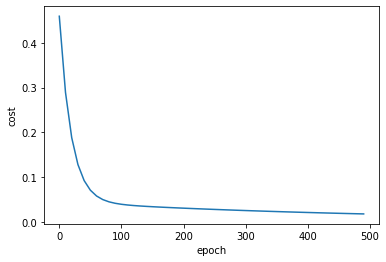

In [109]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [113]:
def predict(area,balcony,w,b):
    scaled_X=sx.transform([[area,balcony]])[0]

    scaled_price=w[0]*scaled_X[0]+w[1]*scaled_X[1]+b
    return sy.inverse_transform([[scaled_price]])
    

predict(2600,4,w,b)

array([[1420.24061958]])

In [135]:
import random
def stochastic_gradient_descent(X,y_true,epochs,learning_rate=.01):
    number_of_features=X.shape[1]

    w=np.ones(shape=(number_of_features))
    b=0
    total_sample=X.shape[0]

    cost_list=[]
    epoch_list=[]

    for i in range(epochs):
        random_index=random.randint(0,total_sample-1)
        sample_X=X[random_index]
        sample_y=y_true[random_index]
        y_predicted=np.dot(w,sample_X.T)+b

        w_grad=-2*(sample_X.T.dot(sample_y-y_predicted))
        b_grad=-2*np.sum(sample_y-y_predicted)

        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad

        cost=np.mean(np.square(sample_y-y_predicted))
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost_list,epoch_list

In [136]:
w_sgd,b_sgd,cost_sgd,epoch_sgd=stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),1000)
w_sgd,b_sgd

(array([0.85920668, 0.22509257]), -0.20772602374056345)

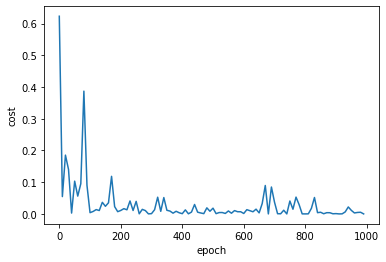

In [137]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_sgd,cost_sgd)

In [153]:
predict(2077,3,w_sgd,b_sgd)

array([[594.47739996]])

In [350]:
def mini_batch_gradient(X,y_true,epochs,batch_size=5,learning_rate=.01):
    number_of_features=X.shape[1]

    w=np.ones(shape=(number_of_features))
    b=0
    total_sample=X.shape[0]

    cost_list=[]
    epoch_list=[]

    if batch_size>=total_sample:
        batch_size=total_sample-1

    for i in range(epochs):
        random_index=random.randint(0,total_sample-1-batch_size)
        sample_X=X[random_index:random_index+batch_size]
        sample_y=y_true[random_index:random_index+batch_size]
        n=len(sample_y)  

        y_predicted=np.dot(w,sample_X.T)+b 

        w_grad=-(2/n)*(sample_X.T.dot(sample_y-y_predicted))
        b_grad=-(2/n)*np.sum(sample_y-y_predicted)

        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad

        cost=np.mean(np.square(sample_y-y_predicted))
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w,b,cost_list,epoch_list

In [363]:
w_mbg,b_mbg,cost_mbg,epoch_mbg=mini_batch_gradient(scaled_X,scaled_y.reshape(scaled_y.shape[0],),1000,100)
w_mbg,b_mbg

(array([0.85481992, 0.22769343]), -0.20832998568859473)

In [364]:
predict(1250.0,2.0,w_mbg,b_mbg)

array([[119.10635385]])

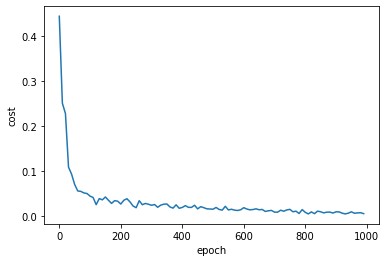

In [365]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_mbg,cost_mbg)

In [ ]:
# imp points here ---|

In [89]:
x=np.array([1,2,3])
x.shape

(3,)

In [90]:
x

array([1, 2, 3])

In [93]:
y=np.array([[1,2,3],[4,5,6]])
y    # --> (2,3)

array([[1, 2, 3],
       [4, 5, 6]])

In [95]:
y.dot(x)

array([14, 32])